Importes that you might need are given below

# import

8.530612244897958E-16  צעד הזמן שנבחר לחלק הזה


8.31109168E-14

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_23928\1957008439.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


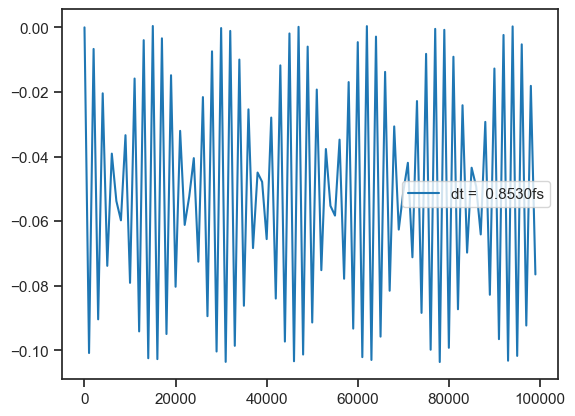

In [8]:

#for i in range (5): 
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values
y = (df["E"].values - df["E"].values[0])/df["E"].values *100
plt.plot(x,y,label ='dt =  '+str(8.530612244897958E-16*1E15)[:6] + "fs" )
plt.legend()


In [2]:
mass = 6.6E-26
omega = 7.56E13
(5/1E10*omega)**2*0.5*mass #חישבנו מראש את האנרגיה הכוללת, ויצא קרוב לתוצאות




4.715172e-17

# The Harmonic Oscillator

Start with one dimensional harmonic trap: $V=\frac{1}{2}m\omega^2 x^2$

**Simulation details:**

Number of particles: 1.

Initial position: x = 5 Angstrom.

Initial momenta: Zero.

Nsteps = 10000.

trap frequency, $\hbar\omega = 50 meV$

**Questions \& Figures**


1. Figure 1: Plot the change in the total energy with respect to t=0 (in precent) vs. time for different values of dt.
What is the largest dt you can use so that the energy is conserved better than 0.1% of its initial value?
1. Figure 2: Plot the position of the particle vs. time. Explain the observed dynamics.
1. Figure 3: Plot the potential and kinteic energies vs. time.
1. Figure 4: Plot the histogram of the position of the particle.
1. Figure 5: Plot the histogram of the momenta of the particle.
Explain the shape of the histograms in Figures 4-5. How do you excpect them to change in the canonical ensemble?


## figure 1

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_24140\4014309119.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim"+str(i)+".log",sep='\s+')


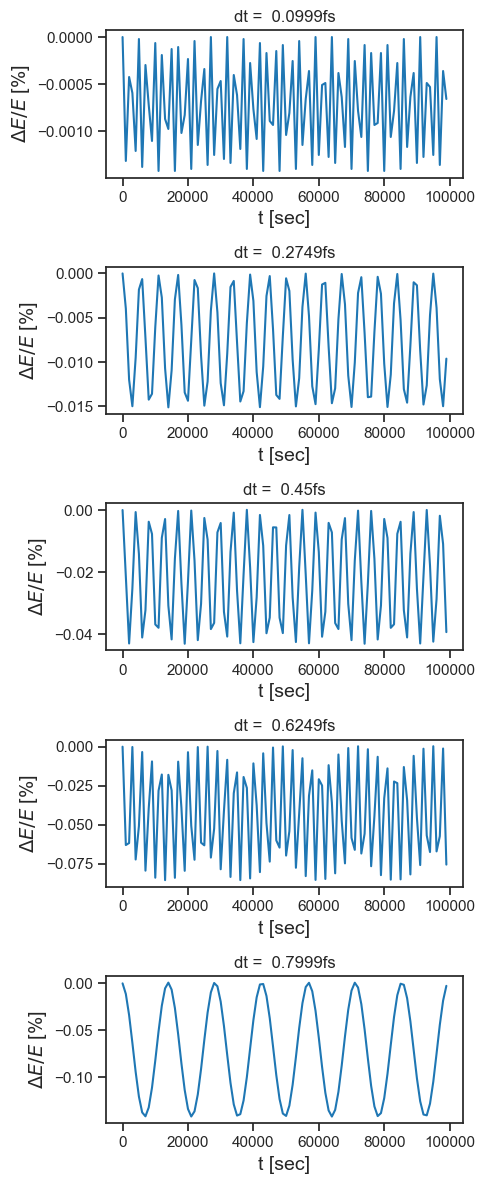

In [5]:
# just an example, you can do somthing else
fig, ax = plt.subplots(5,1,figsize=(5,12))
for i,dt in enumerate(np.linspace(0.1E-15, 0.8E-15, 5)):

    df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
    x = df["step"].values
    y = (df["E"].values - df["E"].values[0])/df["E"].values[0] *100
    ax[i].plot(x,y,label=str(i))
    # plt.legend()
    
    ax[i].set_title('dt =  '+str(dt*1E15)[:6] + "fs")
    ax[i].set_xlabel('t [sec]')
    ax[i].set_ylabel(r'$\Delta E/E$ [%]')
plt.tight_layout()


## figure 2


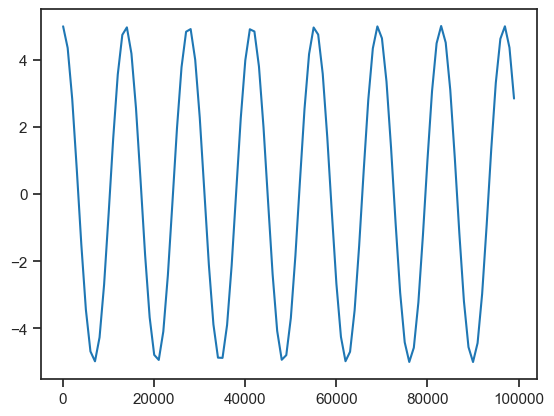

In [10]:
df = open("sim.xyz", 'r')

steps= []
pos= []

i = 0
for line in df:
    if (i%3 == 1):
        tmp = line.split()
        steps.append(float(tmp[-1]))
    elif(i%3 == 2):
        tmp = line.split()
        pos.append(float(tmp[1]))
    i+=1
plt.plot(steps,pos)

df.close()

## figure 3


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_2520\436794184.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


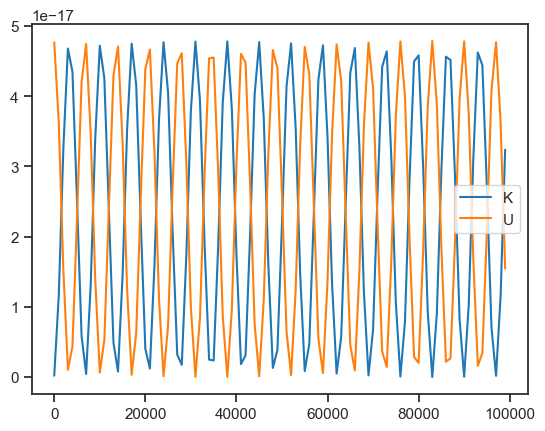

In [3]:
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values
plt.plot(x,df["K"].values,label ="K")
plt.plot(x,df["U"].values,label ="U")
plt.legend()

## figure 4



(array([16.,  8.,  4.,  6.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  6.,
         7., 18.]),
 array([-4.99812   , -4.33158233, -3.66504467, -2.998507  , -2.33196933,
        -1.66543167, -0.998894  , -0.33235633,  0.33418133,  1.000719  ,
         1.66725667,  2.33379433,  3.000332  ,  3.66686967,  4.33340733,
         4.999945  ]),
 <BarContainer object of 15 artists>)

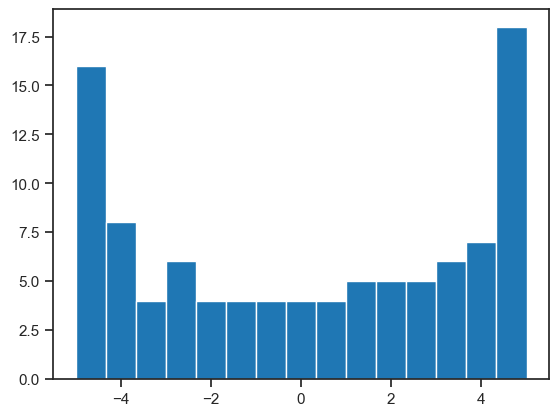

In [17]:
df = open("sim.xyz", 'r')

steps= []
pos= []

i = 0
for line in df:
    if (i%3 == 1):
        tmp = line.split()
        steps.append(float(tmp[-1]))
    elif(i%3 == 2):
        tmp = line.split()
        pos.append(float(tmp[1]))
    i+=1
plt.hist(pos, bins = 15)


## figure 5

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_21932\1246175636.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("momenta.log",sep='\s+')


(array([21.,  9.,  8.,  6.,  7.,  7.,  6.,  7.,  9., 20.]),
 array([-2.5175040e-11, -2.0139804e-11, -1.5104568e-11, -1.0069332e-11,
        -5.0340960e-12,  1.1400000e-15,  5.0363760e-12,  1.0071612e-11,
         1.5106848e-11,  2.0142084e-11,  2.5177320e-11]),
 <BarContainer object of 10 artists>)

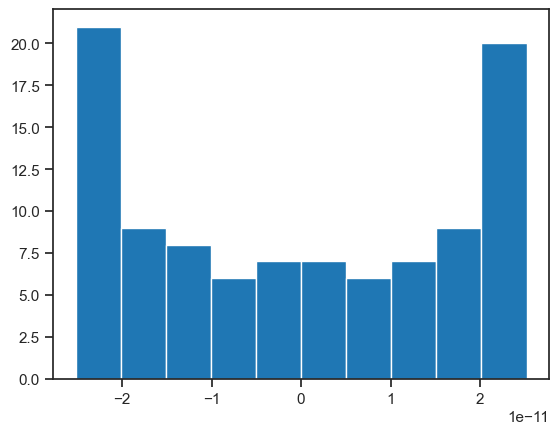

In [22]:
df = pd.read_csv("momenta.log",sep='\s+')

plt.hist(df["MOMENTA_X"].values)

## figure 6 - constant temp


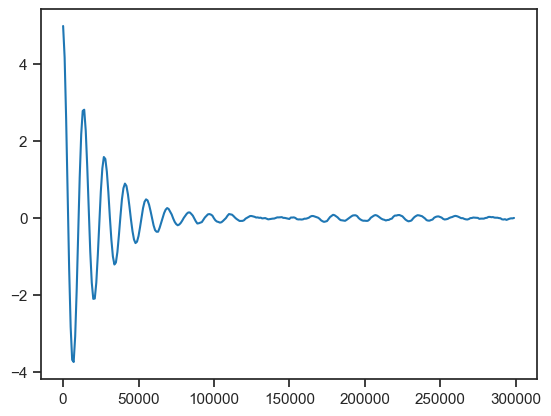

In [10]:
df = open("sim.xyz", 'r')

steps= []
pos= []

i = 0
for line in df:
    if (i%3 == 1):
        tmp = line.split()
        steps.append(float(tmp[-1]))
    elif(i%3 == 2):
        tmp = line.split()
        pos.append(float(tmp[1]))
    i+=1
plt.plot(steps,pos)

df.close()

## figure 7


446.69907941388885


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_23584\2238324739.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


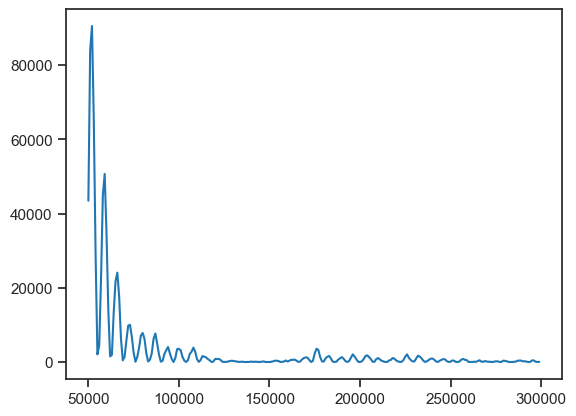

In [25]:
df = pd.read_csv("sim.log",sep='\s+')
x = df["step"].values
plt.plot(x[50:],df["T"].values[50:])
print((df["T"].values[120:]).mean())
# plt.yscale('log')

## figure 8 - optimal gamma

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_23584\1474879854.py:4: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim"+str(i)+".log",sep='\s+')


<ErrorbarContainer object of 3 artists>

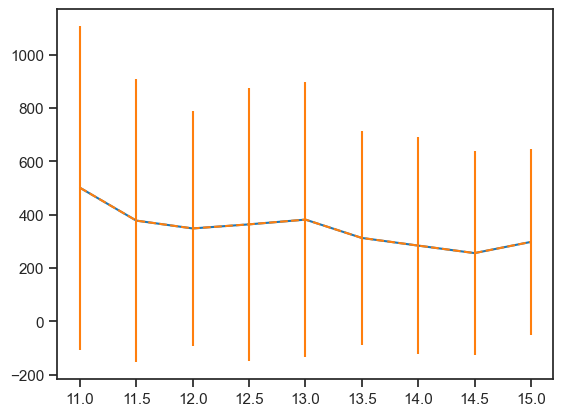

In [2]:
std = []
avgtemp =[]
for i in np.linspace(11, 15, 9):
    df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
    avgtemp.append((df["T"].values[150:]).mean())
    std.append((df["T"].values[150:]).std())
x = np.linspace(11, 15, 9)
plt.plot(x,avgtemp)

plt.errorbar(x,avgtemp,std,linestyle='--')

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_23584\477767262.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
C:\Users\elira\AppData\Local\Temp\ipykernel_23584\477767262.py:9: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim15.0.log",sep='\s+')


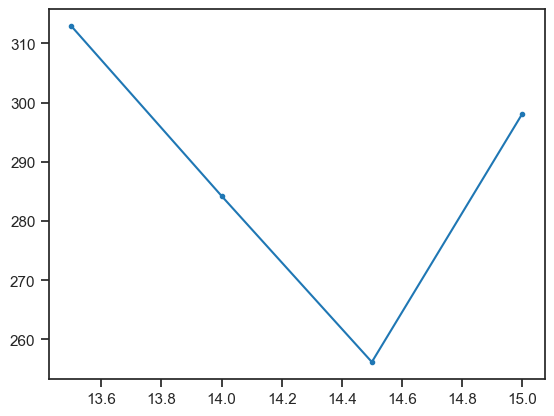

In [22]:
std = []
avgtemp =[]

for i in np.linspace(13.5, 14.5, 3):
    df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
    avgtemp.append((df["T"].values[150:]).mean())
    std.append((df["T"].values[150:]).std())
x = np.linspace(13.5, 15, 4)
df = pd.read_csv("sim15.0.log",sep='\s+')
avgtemp.append( (df["T"].values[150:300]).mean())
plt.plot(x,avgtemp,'.-')

# print(avgtemp)
# std = []
# avgtemp =[]
# for i in np.linspace(13.5, 14.5, 3):
#     df = pd.read_csv("sim"+str(i)+".log",sep='\s+')
#     avgtemp.append((df["T"].values[150:300]).mean())
#     std.append((df["T"].values[150:300]).std())
# plt.plot(x,avgtemp,'.-')
# avgtemp


# df = pd.read_csv("sim15.0.log",sep='\s+')
# print( (df["T"].values[150:300]).mean())
# plt.errorbar(x,avgtemp,std,linestyle='--')

gamma = 1E13.8

## figure 9


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_19560\1259558271.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("momenta.log",sep='\s+')


(array([ 1.,  0.,  0.,  1.,  3.,  9., 14., 15., 29., 28., 26., 31., 34.,
        23., 21., 23., 19.,  8.,  4.,  5.,  3.,  1.,  1.,  0.,  1.]),
 array([-5.2142980e-13, -4.7622242e-13, -4.3101504e-13, -3.8580766e-13,
        -3.4060028e-13, -2.9539290e-13, -2.5018552e-13, -2.0497814e-13,
        -1.5977076e-13, -1.1456338e-13, -6.9356000e-14, -2.4148620e-14,
         2.1058760e-14,  6.6266140e-14,  1.1147352e-13,  1.5668090e-13,
         2.0188828e-13,  2.4709566e-13,  2.9230304e-13,  3.3751042e-13,
         3.8271780e-13,  4.2792518e-13,  4.7313256e-13,  5.1833994e-13,
         5.6354732e-13,  6.0875470e-13]),
 <BarContainer object of 25 artists>)

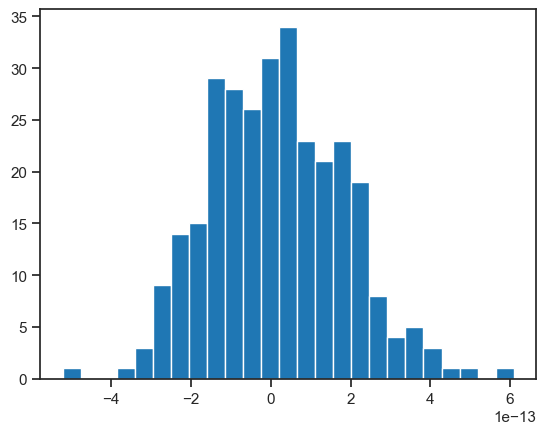

In [2]:
df = pd.read_csv("momenta.log",sep='\s+')

plt.hist(df["MOMENTA_X"].values[100:], bins=25)

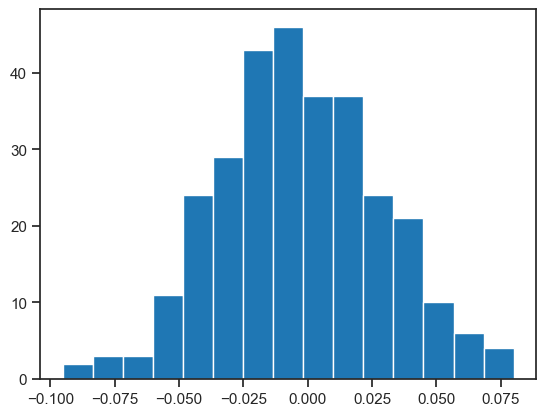

: 

In [4]:
df = open("sim.xyz", 'r')

steps= []
pos= []

i = 0
for line in df:
    if (i%3 == 1):
        tmp = line.split()
        steps.append(float(tmp[-1]))
    elif(i%3 == 2):
        tmp = line.split()
        pos.append(float(tmp[1]))
    i+=1
plt.hist(pos[100:], bins = 15)

df.close()

(array([12.,  4.,  4.,  2.,  4.,  2.,  4.,  4.,  4., 10.]),
 array([-1.        , -0.80020546, -0.60041092, -0.40061638, -0.20082184,
        -0.0010273 ,  0.19876724,  0.39856177,  0.59835631,  0.79815085,
         0.99794539]),
 <BarContainer object of 10 artists>)

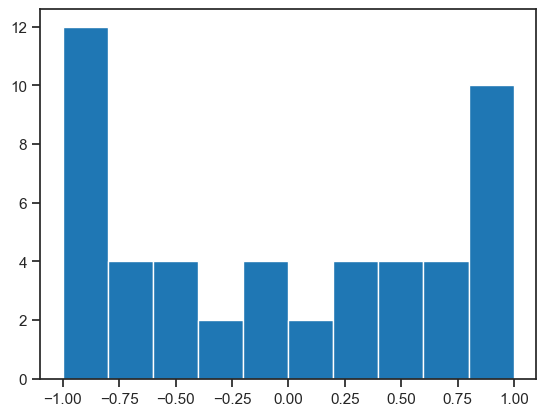

In [5]:
x = np.linspace(-np.pi, np.pi)
plt.hist(np.cos(x))
